# CAR PRICE PREDICTION WITH MACHINE LEARNING :-
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the
 mileage it gives and many more. Car price prediction is one of the major research areas in
 machine learning. So if you want to learn how to train a car price prediction model then
 this project is for you.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('/kaggle/input/car-prediction-with-machine-learnig/car data.csv')
data


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Handle Missing Values

In [3]:
print(data.isnull().sum())
data.dropna(inplace=True)  # Drop rows with missing values (or impute them)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


#  Basic Data Visualization

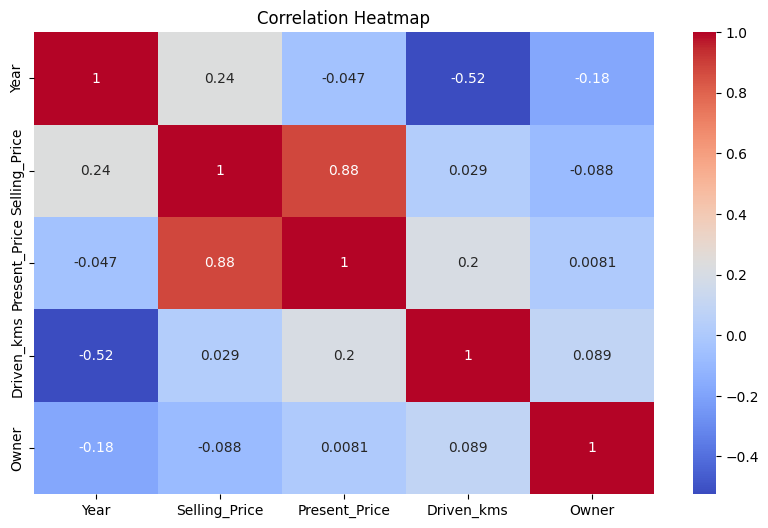

In [4]:
# Now you can calculate the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

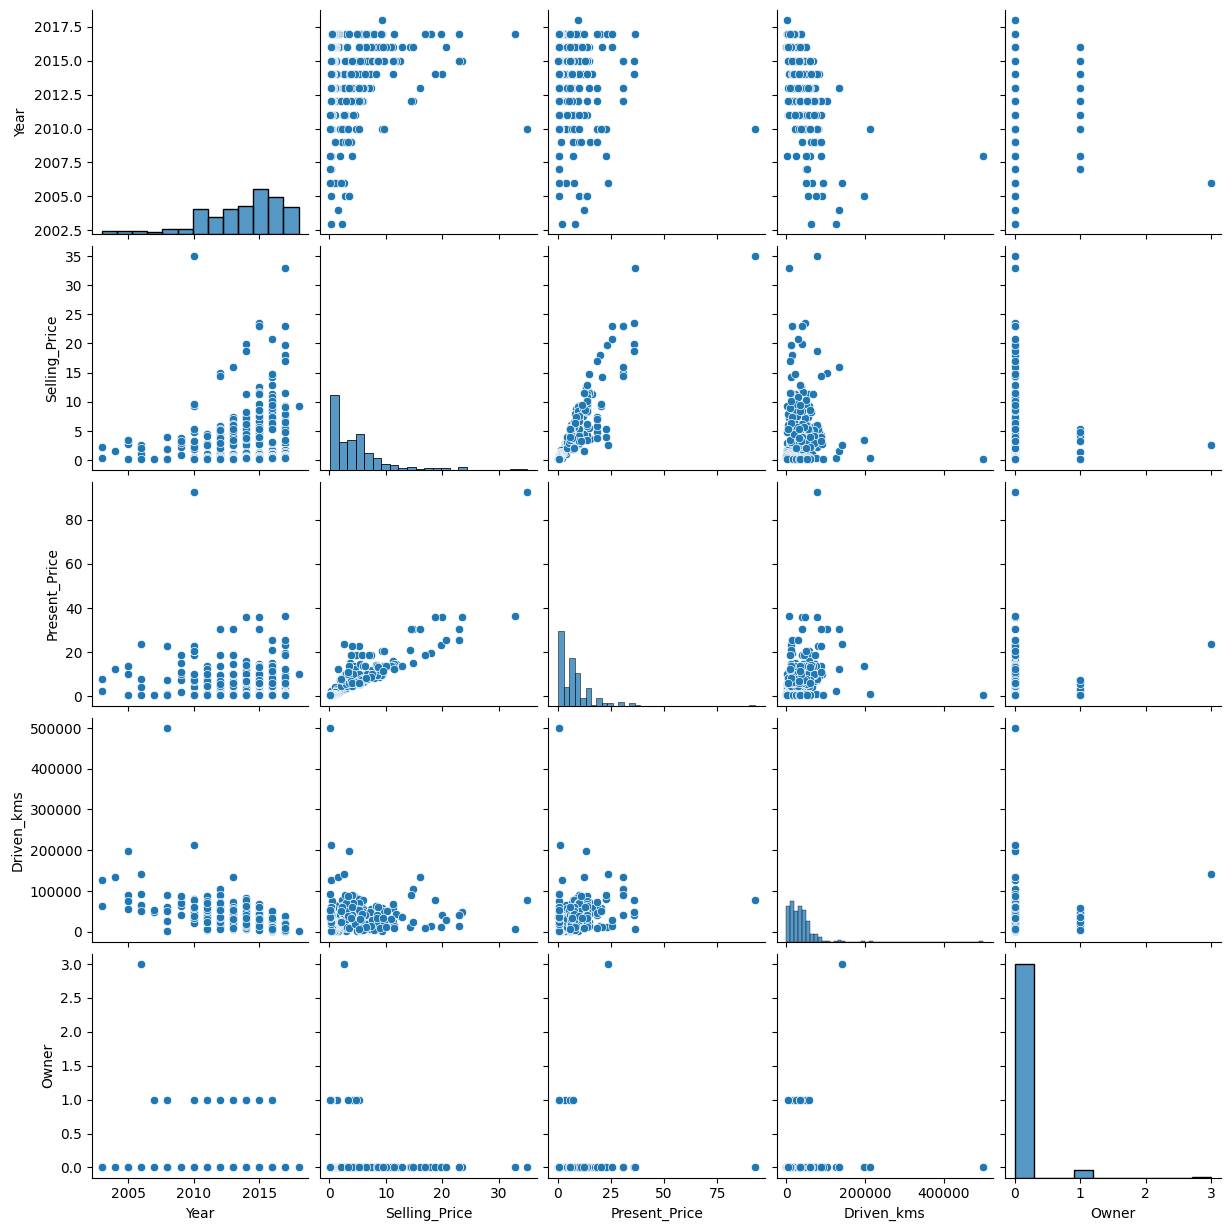

In [5]:
sns.pairplot(data)
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Drop other unnecessary columns if present (like 'Car_Name')
if 'Car_Name' in data.columns:
    data = data.drop(['Car_Name'], axis=1)

# Handle categorical columns with encoding (get_dummies)
data = pd.get_dummies(data, drop_first=True)  # One-Hot Encode categorical columns

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('Selling_Price', axis=1)  # Features (Independent variables)
y = data['Selling_Price']  # Target (Dependent variable)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (240, 8)
X_test shape: (61, 8)
y_train shape: (240,)
y_test shape: (61,)


In [7]:
# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.4813498305146187


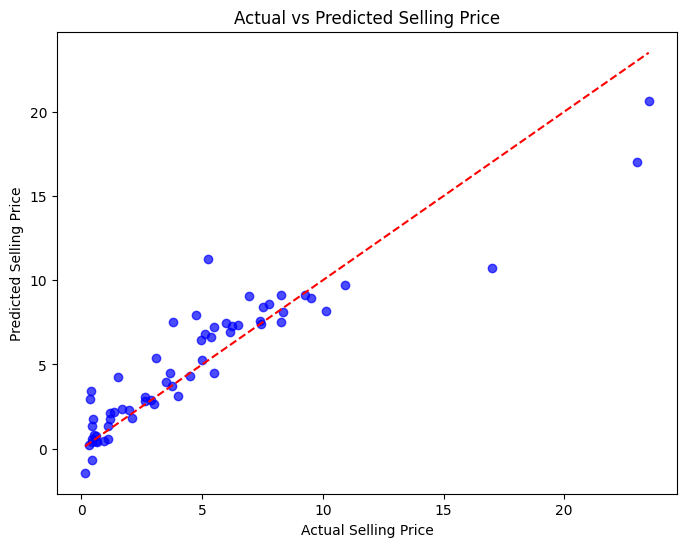

In [8]:
#Scatter Plot of Actual vs. Predicted Prices:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()


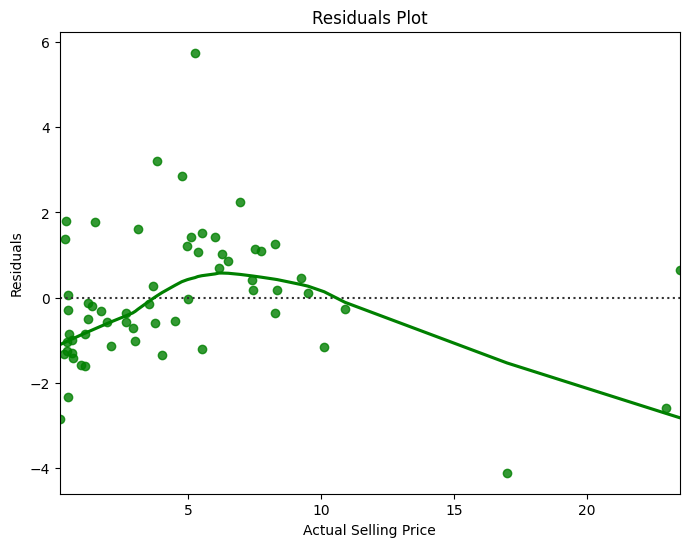

In [9]:
#Residual Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')  # Correct syntax with keyword arguments
plt.title('Residuals Plot')
plt.xlabel('Actual Selling Price')
plt.ylabel('Residuals')
plt.show()



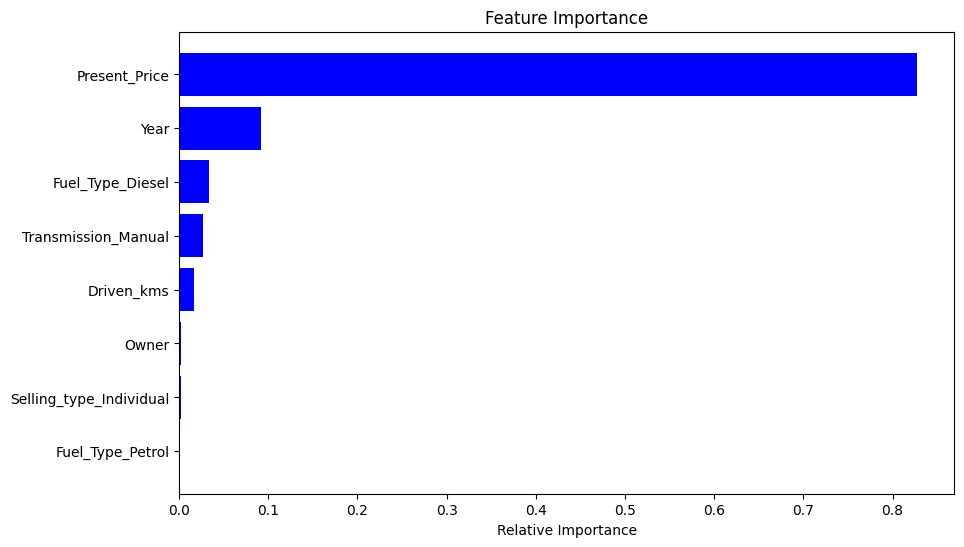

In [10]:
#Feature Importance Plot (for XGBoost/Random Forest)
from xgboost import XGBRegressor
import numpy as np

# Train the model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
importance = xgb_model.feature_importances_
indices = np.argsort(importance)
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()


In [11]:
#Final Preprocessed Data
print(X_train[:300]) 


     Year  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  \
184  2008          0.750       26000      1             False   
132  2017          0.950        3500      0             False   
194  2008          0.787       50000      0             False   
75   2015          6.800       36000      0             False   
111  2016          1.500        8700      0             False   
..    ...            ...         ...    ...               ...   
188  2013          0.570       18000      0             False   
71   2011         12.480       45000      0              True   
106  2014          3.450       16500      1             False   
270  2011         10.000       69341      0             False   
102  2017          1.780        4000      0             False   

     Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
184              True                     True                 True  
132              True                     True                 True  
194      

In [12]:

#Calculate Accuracy Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 3.4813498305146187
Root Mean Squared Error (RMSE): 1.865837568094988
Mean Absolute Error (MAE): 1.2163740193336217
R-squared (R²): 0.8488707839191938
